# DEFINITION OF FUNCTIONS

In [1]:
# Functions to save and load variables/data

def pickle_save(name, path, data, verbose=True):
    if not os.path.exists(path):
        os.makedirs(path)
    full_name = (os.path.join(path,name+ '.npy'))


    with open(full_name, 'wb') as f2:
        pickle.dump(data, f2)
    if verbose:
        print('saved at : ',full_name)

def pickle_load(name, path, verbose=True):
    #if not os.path.exists(path):
    #    os.makedirs(path)
    full_name= (os.path.join(path,name+ '.npy'))

    with open(full_name, 'r') as f:
        data=pickle.load(f)

    if verbose:
        print('loaded from : ',full_name)
    return data

In [2]:
def merc_map(cbar_levels, X, Y, data, title, title_colorbar, cmap, path_save, title_save):
        '''
        Function for plotting a lambert projection map.
        
        Args : 
        cbar_levels, X, Y, data, title, title_colorbar, path_save, title_save
        '''
        import matplotlib.pyplot as plt
        import numpy as np
        from mpl_toolkits.basemap import Basemap
        
        v       = cbar_levels
        fig     = plt.figure(figsize=(12,12))
        m       = Basemap(projection='merc',llcrnrlat=-80.,urcrnrlat=-30.,\
                  llcrnrlon=150.,urcrnrlon=270.,lat_ts=-60.,resolution='c')
        #m       = Basemap(llcrnrlon=lon[0],llcrnrlat=-70.,urcrnrlon=lon[-1],urcrnrlat=lat[-1],\
        #          rsphere=(6378137.00,6356752.3142),\
        #          resolution='l',area_thresh=1000.,projection='lcc',\
        #          lat_1=-70.,lon_0=-185.)
        xm, ym  = m(X, Y)
        im      = m.contourf(xm, ym, data, levels=v, extend='both', cmap=cmap)

        cbar = m.colorbar(im,pad='10%')
        cbar.set_label(title_colorbar, fontsize =16)

        m.fillcontinents(color='0.5', lake_color='0.5')
        m.drawparallels(np.arange(-80.,-30.,10), labels=[1, 0, 0, 0])
        m.drawmeridians(np.arange(150.,270.,10), labels=[0, 0, 0, 1])
        m.drawcoastlines()



        plt.title(title, fontsize=18)
        plt.savefig(path_save + title_save, bbox_inches='tight')

***

# PACKAGES

In [3]:
%matplotlib inline

# Import packages
import matplotlib.pyplot as plt
import numpy as np
from numpy import cos, pi
import h5py
from scipy.io import loadmat
from mpl_toolkits.basemap import Basemap
import netCDF4
from scipy import interpolate
import os
import pickle

plot_path_1993_2017='/home/ebent/plots/1993_2017/'
plot_path_2006_2011='/home/ebent/plots/2006_2011/'
plot_path_jup='/home/ebent/plots/2006_2011/jup2/'
load_path='/data/mmazloff/AVISO/'
load_path2='/data/SO12/runs/RUN_BLING_Dec2017/SO12_RUN/DIAGNOSTICS/'
load_path3='/data/soccom/GRID_12/'

# Salinity

In [4]:
# Load variables
mean_Salt_surf = pickle_load('mean_Salt_surf_2', '/data/ebent')
mean_Salt_30 = pickle_load('mean_Salt_30_2', '/data/ebent')
mean_Salt_100 = pickle_load('mean_Salt_100_2', '/data/ebent')
mean_Salt_200 = pickle_load('mean_Salt_200_2', '/data/ebent')
mean_Salt_500 = pickle_load('mean_Salt_500_2', '/data/ebent')

('loaded from : ', '/data/ebent/mean_Salt_surf_2.npy')
('loaded from : ', '/data/ebent/mean_Salt_30_2.npy')
('loaded from : ', '/data/ebent/mean_Salt_100_2.npy')
('loaded from : ', '/data/ebent/mean_Salt_200_2.npy')
('loaded from : ', '/data/ebent/mean_Salt_500_2.npy')


In [4]:
# Load files
file1 = netCDF4.Dataset(load_path2+'so12_i0_year2006_5day_Salt.nc','r')
file2 = netCDF4.Dataset(load_path2+'so12_i0_year2007_5day_Salt.nc','r')
file3 = netCDF4.Dataset(load_path2+'so12_i0_year2008_5day_Salt.nc','r')
file4 = netCDF4.Dataset(load_path2+'so12_i0_year2009_5day_Salt.nc','r')
file5 = netCDF4.Dataset(load_path2+'so12_i0_year2010_5day_Salt.nc','r')
file6 = netCDF4.Dataset(load_path2+'so12_i0_year2011_5day_Salt.nc','r')

In [6]:
file1.variables.keys()

[u'time', u'lat', u'lon', u'depth', u'Salt']

***

#### This is the min and max for what I call the bigger domain which is the domain I use in Octopus

In [5]:
lon_min   = 1440 
lon_max   = 3241
lat_min   = 0 
lat_max   = 1024

In [6]:
lat = file1.variables['lat'][:]
lon = file1.variables['lon'][:]

In [7]:
print(lon[lon_min], lon[lon_max], lat[lat_min], lat[lat_max])

(120.04166412353516, 270.125, -77.9913330078125, -39.992000579833984)


In [8]:
lat = file1.variables['lat'][lat_min:lat_max]
lon = file1.variables['lon'][lon_min:lon_max]
Lon, Lat = np.meshgrid(lon,lat)

In [11]:
Lon.shape # this is the shape I want for my study of particles

(1024, 1801)

***

#### This is the min and max for the validation of the model

In [30]:
# Select a specific region
lon_min = 1800
lon_max = 3240
lat_min = 0
lat_max = 1170

In [13]:
lat = file1.variables['lat'][:]
lon = file1.variables['lon'][:]

In [14]:
print(lon[lon_min], lon[lon_max], lat[lat_min], lat[lat_max])

(150.04167175292969, 270.04165649414062, -77.9913330078125, -30.053228378295898)


In [15]:
lat = file1.variables['lat'][lat_min:lat_max]
lon = file1.variables['lon'][lon_min:lon_max]
Lon, Lat = np.meshgrid(lon,lat)

In [16]:
Lon.shape

(1170, 1440)

***

In [8]:
depth = file1.variables['depth'][:]
surf = depth[0]
depth_100 = depth[24]
depth_200 = depth[39]
print(surf, depth_100, depth_200)

(1.0, 102.5, 205.0)


In [9]:
index_DJF = np.append(np.arange(12), np.arange(67,73))
index_JJA = np.arange(30,49)

In [9]:
depth = file1.variables['depth'][:]

In [10]:
lon.shape, lat.shape, depth.shape

((4320,), (1260,), (104,))

## Surface

In [27]:
depth[0]

1.0

In [12]:
mean_Salt_surf= (np.ma.mean(file1.variables['Salt'][19:,0,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file2.variables['Salt'][:,0,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file3.variables['Salt'][:,0,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file4.variables['Salt'][:,0,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file5.variables['Salt'][:,0,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file6.variables['Salt'][:,0,lat_min:lat_max, lon_min:lon_max], axis=0))/6

In [13]:
pickle_save('mean_Salt_surf_2', '/data/ebent/Bigger_domain/', mean_Salt_surf)

('saved at : ', '/data/ebent/Bigger_domain/mean_Salt_surf_2.npy')


In [33]:
print(mean_Salt_surf.min(), mean_Salt_surf.max(), np.mean(mean_Salt_surf))

(29.524807878789144, 35.355405685988586, 33.861377587068084)


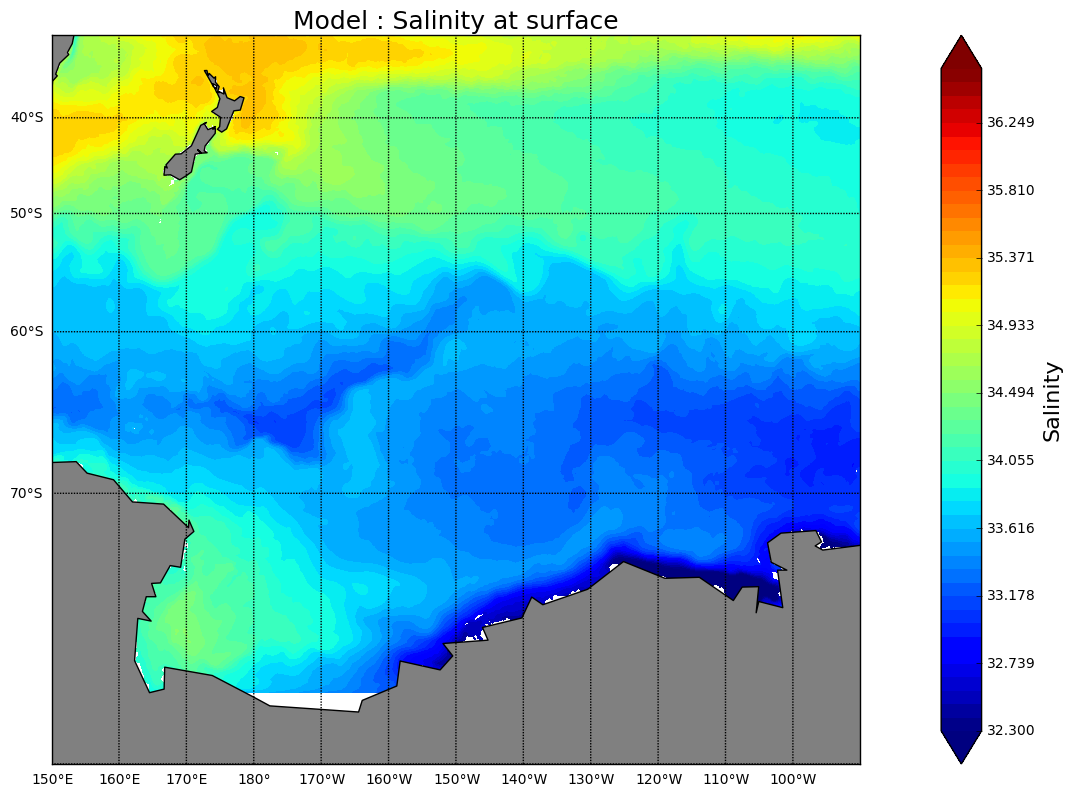

In [41]:
merc_map(np.linspace(32.3,36.6,50), Lon, Lat, mean_Salt_surf, 'Model : Salinity at surface', 'Salinity', plt.cm.jet, plot_path_jup, 'Saltsurf_2_jup.png')

## 30 m

In [29]:
depth[9]

28.25

In [11]:
mean_Salt_30= (np.ma.mean(file1.variables['Salt'][19:,9,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file2.variables['Salt'][:,9,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file3.variables['Salt'][:,9,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file4.variables['Salt'][:,9,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file5.variables['Salt'][:,9,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file6.variables['Salt'][:,9,lat_min:lat_max, lon_min:lon_max], axis=0))/6

In [12]:
pickle_save('mean_Salt_30_2', '/data/ebent/Bigger_domain/', mean_Salt_30)

('saved at : ', '/data/ebent/Bigger_domain/mean_Salt_30_2.npy')


In [22]:
print(mean_Salt_30.min(), mean_Salt_30.max(), np.mean(mean_Salt_30))

(32.139609174244448, 35.365598727975829, 33.934708864659747)


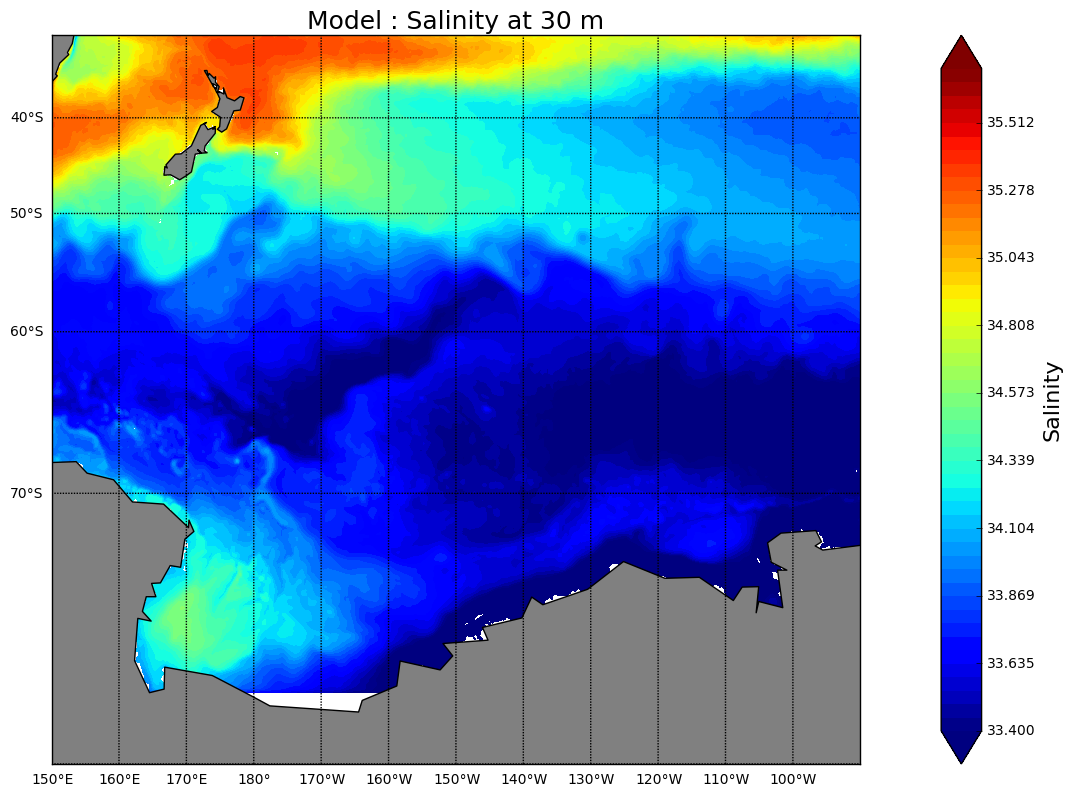

In [42]:
merc_map(np.linspace(33.4,35.7,50), Lon, Lat, mean_Salt_30, 'Model : Salinity at 30 m', 'Salinity', plt.cm.jet, plot_path_jup, 'Salt30_2_jup.png')

## 100 m deep

In [14]:
mean_Salt_100= (np.ma.mean(file1.variables['Salt'][19:,9,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file2.variables['Salt'][:,9,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file3.variables['Salt'][:,9,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file4.variables['Salt'][:,9,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file5.variables['Salt'][:,9,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file6.variables['Salt'][:,9,lat_min:lat_max, lon_min:lon_max], axis=0))/6

In [15]:
pickle_save('mean_Salt_100_2', '/data/ebent/Bigger_domain/', mean_Salt_100)

('saved at : ', '/data/ebent/Bigger_domain/mean_Salt_100_2.npy')


In [23]:
print(mean_Salt_100.min(), mean_Salt_100.max(), np.mean(mean_Salt_100))

(33.211896738023519, 35.429627760899265, 34.280969148737704)


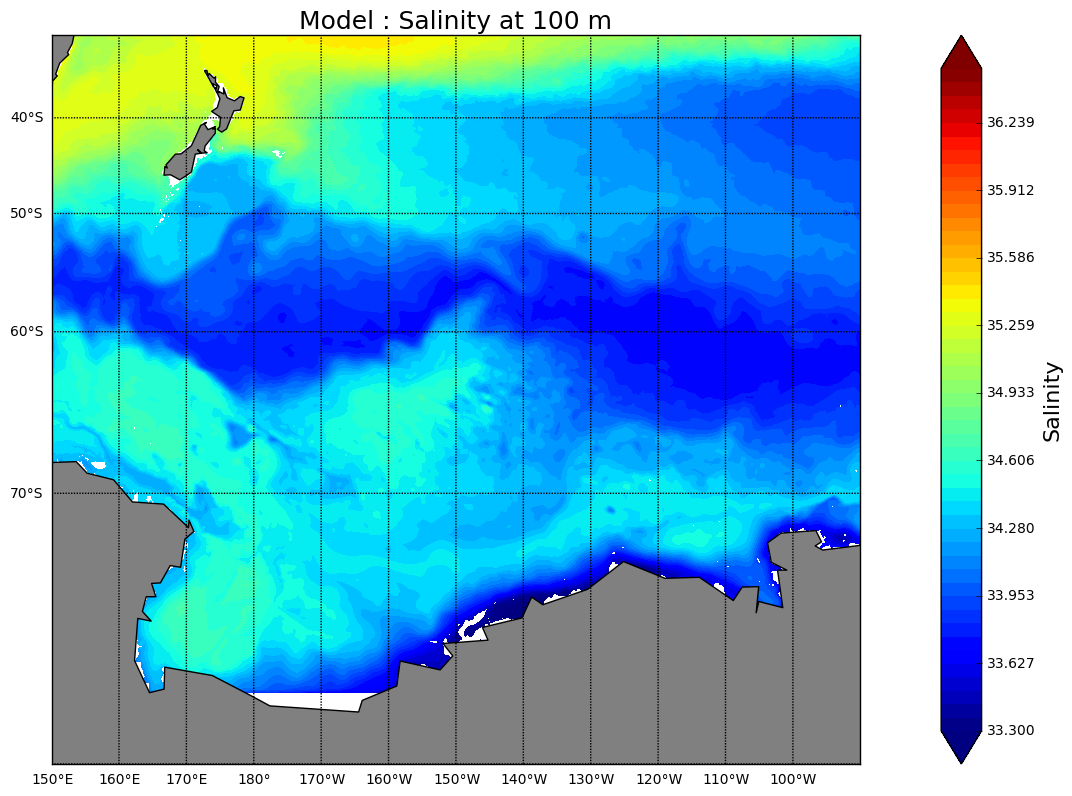

In [37]:
merc_map(np.linspace(33.3,36.5,50), Lon, Lat, mean_Salt_100, 'Model : Salinity at 100 m', 'Salinity', plt.cm.jet, plot_path_jup, 'Salt1_2_jup.png')

## 200 m deep

In [9]:
mean_Salt_200= (np.ma.mean(file1.variables['Salt'][19:,39,lat_min:lat_max, lon_min:lon_max], axis=0) +\
np.ma.mean(file2.variables['Salt'][:,39,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file3.variables['Salt'][:,39,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file4.variables['Salt'][:,39,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file5.variables['Salt'][:,39,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file6.variables['Salt'][:,39,lat_min:lat_max, lon_min:lon_max], axis=0))/6

In [10]:
pickle_save('mean_Salt_200_2', '/data/ebent/Bigger_domain/', mean_Salt_200)

('saved at : ', '/data/ebent/Bigger_domain/mean_Salt_200_2.npy')


In [24]:
print(mean_Salt_200.min(), mean_Salt_200.max(), np.mean(mean_Salt_200))

(33.799991288654077, 35.575120249909709, 34.466292899958425)


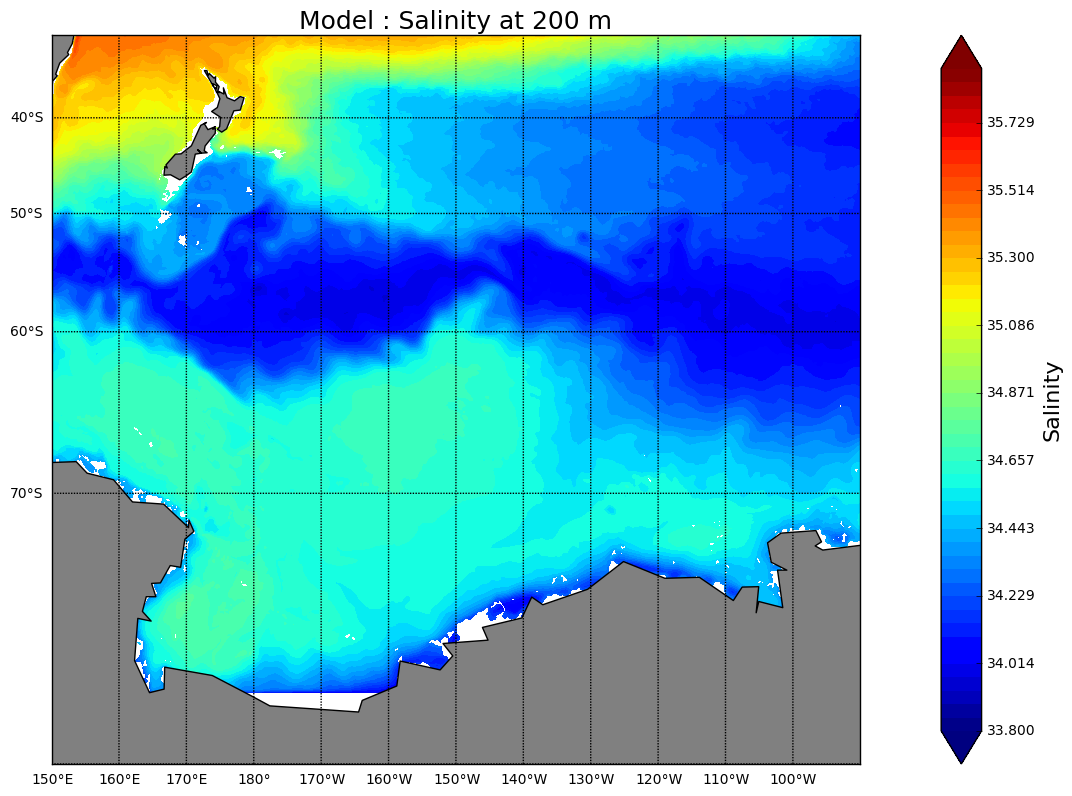

In [38]:
merc_map(np.linspace(33.8,35.9,50), Lon, Lat, mean_Salt_200, 'Model : Salinity at 200 m', 'Salinity', plt.cm.jet, plot_path_jup, 'Salt2_2_jup.png')

## 500 m

In [13]:
mean_Salt_500= (np.ma.mean(file1.variables['Salt'][19:,59,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file2.variables['Salt'][:,59,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file3.variables['Salt'][:,59,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file4.variables['Salt'][:,59,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file5.variables['Salt'][:,59,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file6.variables['Salt'][:,59,lat_min:lat_max, lon_min:lon_max], axis=0))/6

In [14]:
pickle_save('mean_Salt_500_2', '/data/ebent/Bigger_domain/', mean_Salt_500)

('saved at : ', '/data/ebent/Bigger_domain/mean_Salt_500_2.npy')


In [25]:
print(mean_Salt_500.min(), mean_Salt_500.max(), np.mean(mean_Salt_500))

(34.239675834063121, 35.010123572398399, 34.533628002614684)


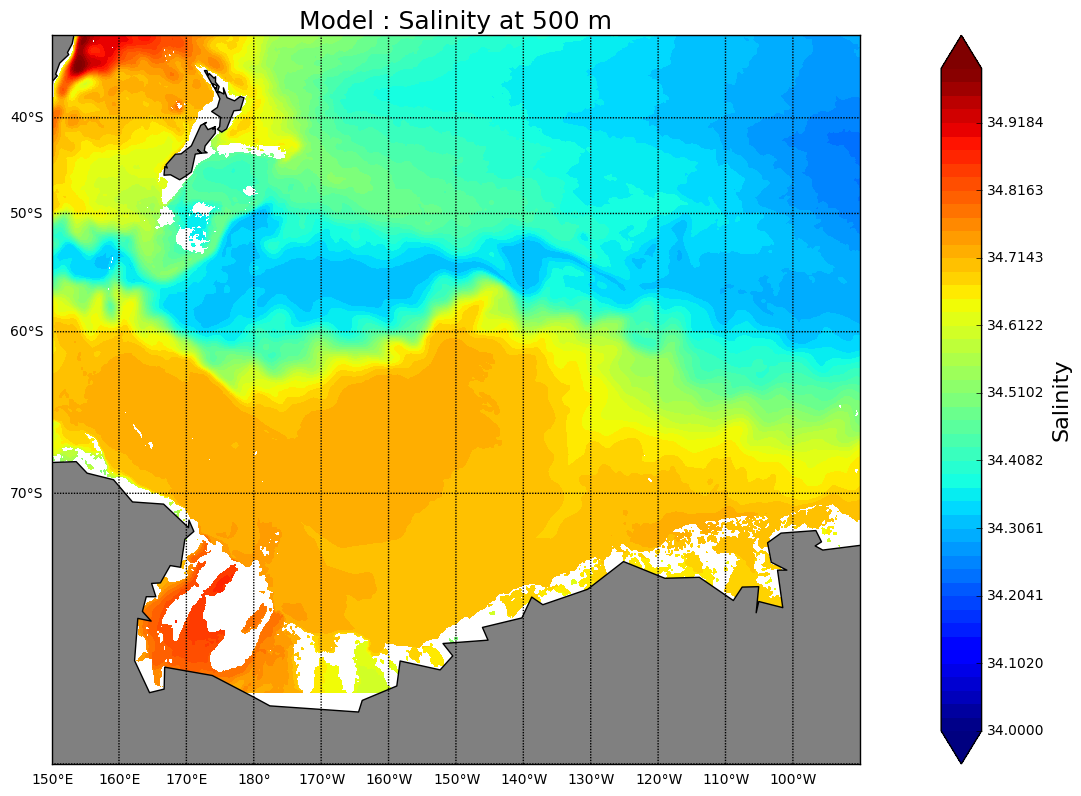

In [39]:
merc_map(np.linspace(34,35,50), Lon, Lat, mean_Salt_500, 'Model : Salinity at 500 m', 'Salinity', plt.cm.jet, plot_path_jup, 'Salt500_2_jup.png')

# DJF

In [14]:
mean_Salt_DJF= (np.ma.mean(file1.variables['Salt'][67:,9,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file2.variables['Salt'][index_DJF,9,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file3.variables['Salt'][index_DJF,9,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file4.variables['Salt'][index_DJF,9,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file5.variables['Salt'][index_DJF,9,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file6.variables['Salt'][:12,9,lat_min:lat_max, lon_min:lon_max], axis=0))/6

In [15]:
pickle_save('mean_Salt_30_DJF', '/data/ebent', mean_Salt_DJF)

('saved at : ', '/data/ebent/mean_Salt_30_DJF.npy')


In [13]:
pickle_save('mean_Salt_100_DJF', '/data/ebent', mean_Salt_DJF)

('saved at : ', '/data/ebent/mean_Salt_100_DJF.npy')


In [11]:
pickle_save('mean_Salt_200_DJF', '/data/ebent', mean_Salt_DJF)

('saved at : ', '/data/ebent/mean_Salt_200_DJF.npy')


***

In [12]:
mean_Salt_30_DJF = pickle_load('mean_Salt_30_DJF', '/data/ebent')
mean_Salt_100_DJF = pickle_load('mean_Salt_100_DJF', '/data/ebent')
mean_Salt_200_DJF = pickle_load('mean_Salt_200_DJF', '/data/ebent')

('loaded from : ', '/data/ebent/mean_Salt_30_DJF.npy')
('loaded from : ', '/data/ebent/mean_Salt_100_DJF.npy')
('loaded from : ', '/data/ebent/mean_Salt_200_DJF.npy')


In [13]:
print(mean_Salt_30_DJF.min(), mean_Salt_30_DJF.max(), np.mean(mean_Salt_30_DJF))
print(mean_Salt_100_DJF.min(), mean_Salt_100_DJF.max(), np.mean(mean_Salt_100_DJF))
print(mean_Salt_200_DJF.min(), mean_Salt_200_DJF.max(), np.mean(mean_Salt_200_DJF))

(31.68381072856762, 35.42758586671617, 33.920490783619556)
(33.294940877843786, 35.44707107543945, 34.28873585370022)
(33.803444880026355, 35.57783978073686, 34.46619991015844)


/usr/local/anaconda2/lib/python2.7/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/usr/local/anaconda2/lib/python2.7/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


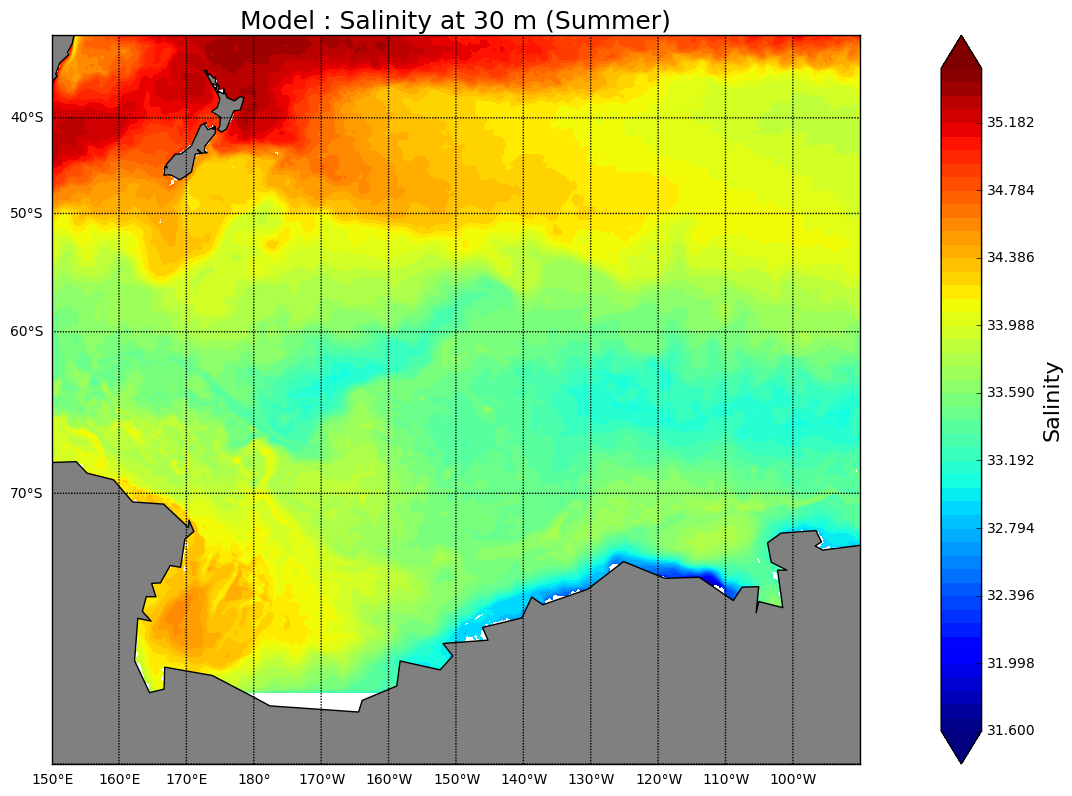

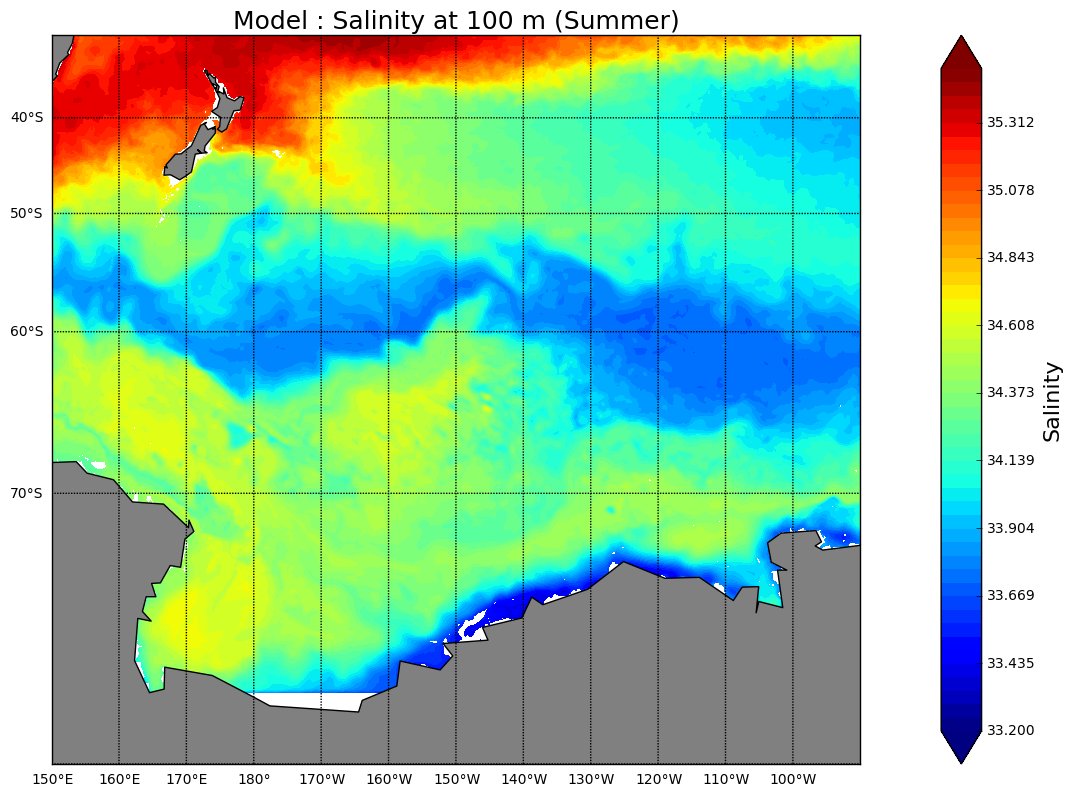

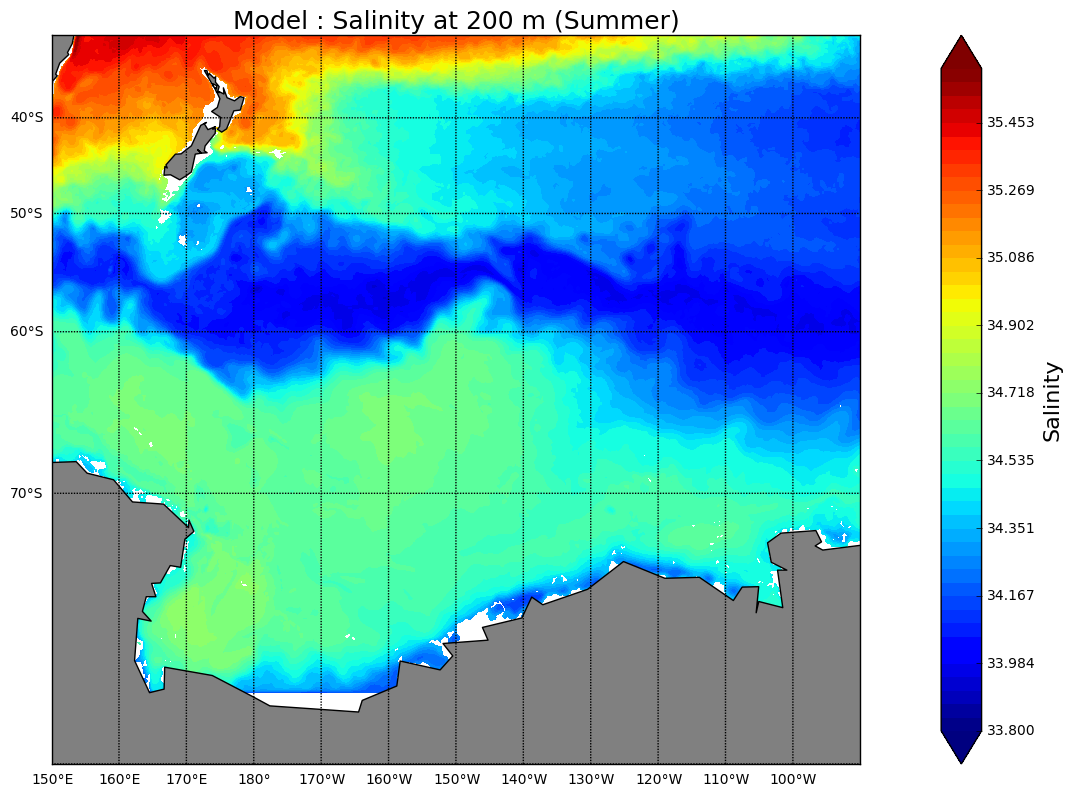

In [14]:
merc_map(np.linspace(31.6,35.5,50), Lon, Lat, mean_Salt_30_DJF, 'Model : Salinity at 30 m (Summer)', 'Salinity', plt.cm.jet, plot_path_jup, 'Winter_S_30_2_jup.png')
merc_map(np.linspace(33.2,35.5,50), Lon, Lat, mean_Salt_100_DJF, 'Model : Salinity at 100 m (Summer)', 'Salinity', plt.cm.jet, plot_path_jup, 'Winter_S_100_2_jup.png')
merc_map(np.linspace(33.8,35.6,50), Lon, Lat, mean_Salt_200_DJF, 'Model : Salinity at 200 m (Summer)', 'Salinity', plt.cm.jet, plot_path_jup, 'Winter_S_200_2_jup.png')

# JJA

In [10]:
mean_Salt_JJA= (np.ma.mean(file1.variables['Salt'][index_JJA,9,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file2.variables['Salt'][index_JJA,9,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file3.variables['Salt'][index_JJA,9,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file4.variables['Salt'][index_JJA,9,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file5.variables['Salt'][index_JJA,9,lat_min:lat_max, lon_min:lon_max], axis=0))/5

In [11]:
pickle_save('mean_Salt_30_JJA', '/data/ebent', mean_Salt_JJA)

('saved at : ', '/data/ebent/mean_Salt_30_JJA.npy')


In [19]:
pickle_save('mean_Salt_100_JJA', '/data/ebent', mean_Salt_JJA)

('saved at : ', '/data/ebent/mean_Salt_100_JJA.npy')


In [17]:
pickle_save('mean_Salt_200_JJA', '/data/ebent', mean_Salt_JJA)

('saved at : ', '/data/ebent/mean_Salt_200_JJA.npy')


***

In [15]:
mean_Salt_30_JJA = pickle_load('mean_Salt_30_JJA', '/data/ebent')
mean_Salt_100_JJA = pickle_load('mean_Salt_100_JJA', '/data/ebent')
mean_Salt_200_JJA = pickle_load('mean_Salt_200_JJA', '/data/ebent')

('loaded from : ', '/data/ebent/mean_Salt_30_JJA.npy')
('loaded from : ', '/data/ebent/mean_Salt_100_JJA.npy')
('loaded from : ', '/data/ebent/mean_Salt_200_JJA.npy')


In [16]:
print(mean_Salt_30_JJA.min(), mean_Salt_30_JJA.max(), np.mean(mean_Salt_30_JJA))
print(mean_Salt_100_JJA.min(), mean_Salt_100_JJA.max(), np.mean(mean_Salt_100_JJA))
print(mean_Salt_200_JJA.min(), mean_Salt_200_JJA.max(), np.mean(mean_Salt_200_JJA))

(32.166117959273485, 35.416781816984475, 33.98503536061277)
(33.04531482897307, 35.485899593955594, 34.26936970953653)
(33.82183343987715, 35.594909346731086, 34.46983086461103)


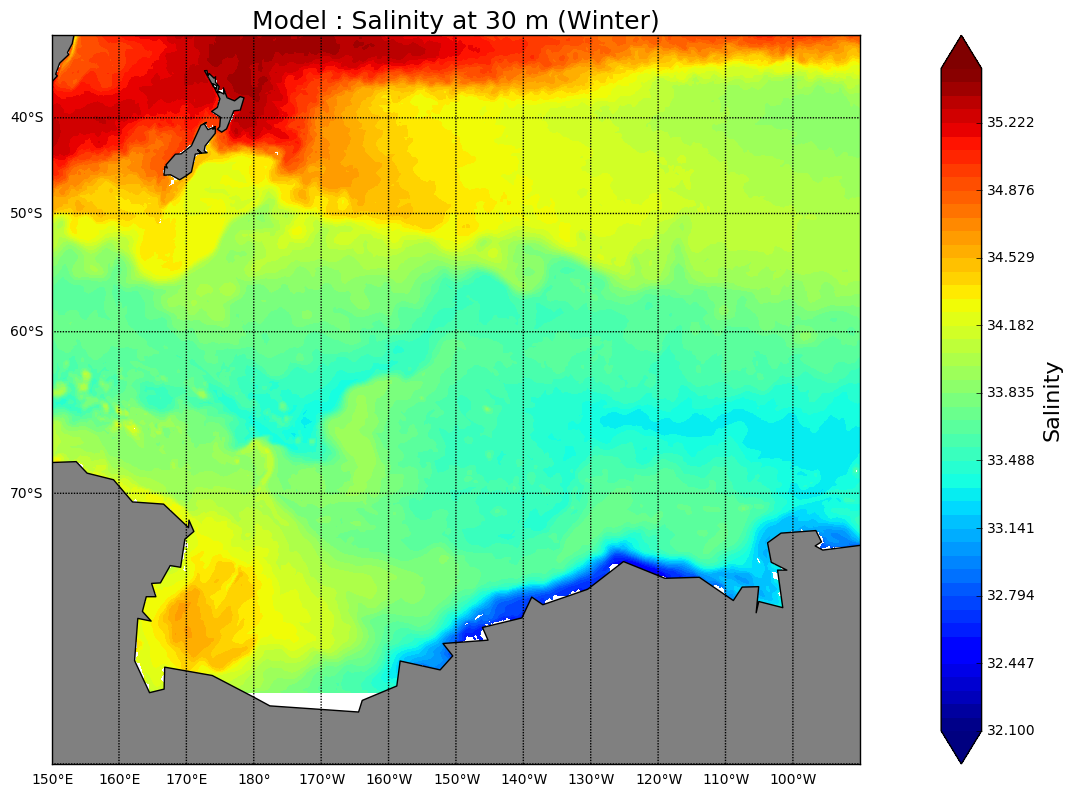

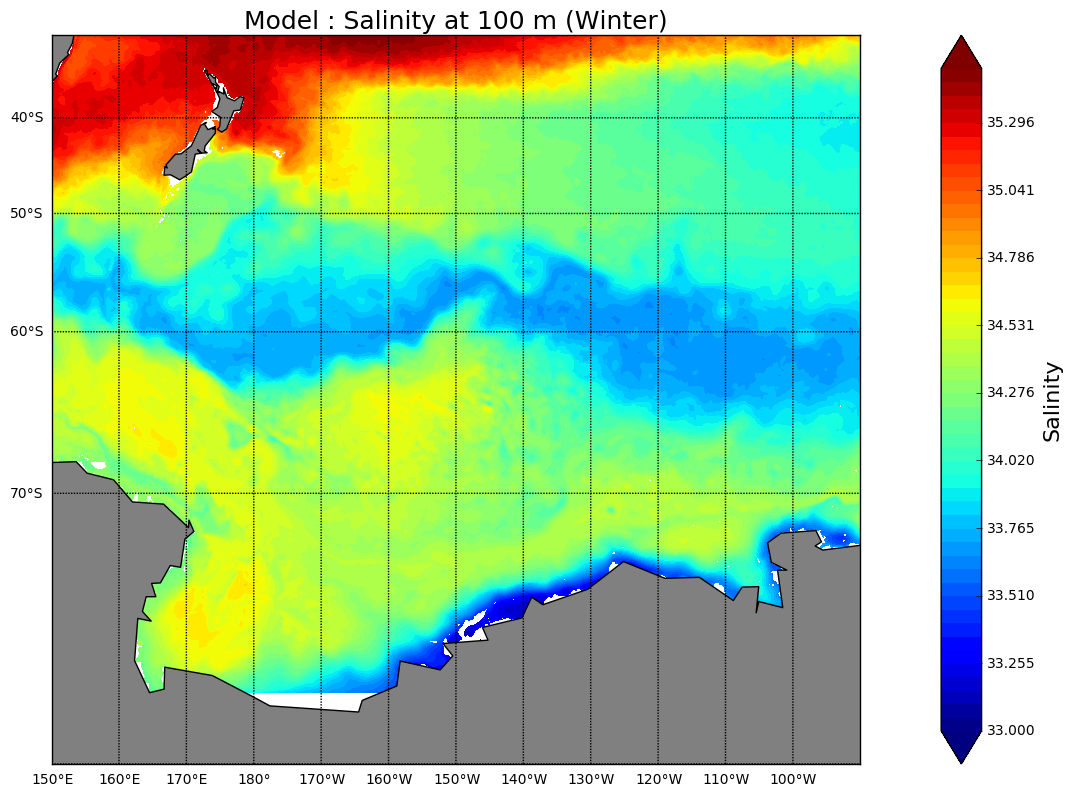

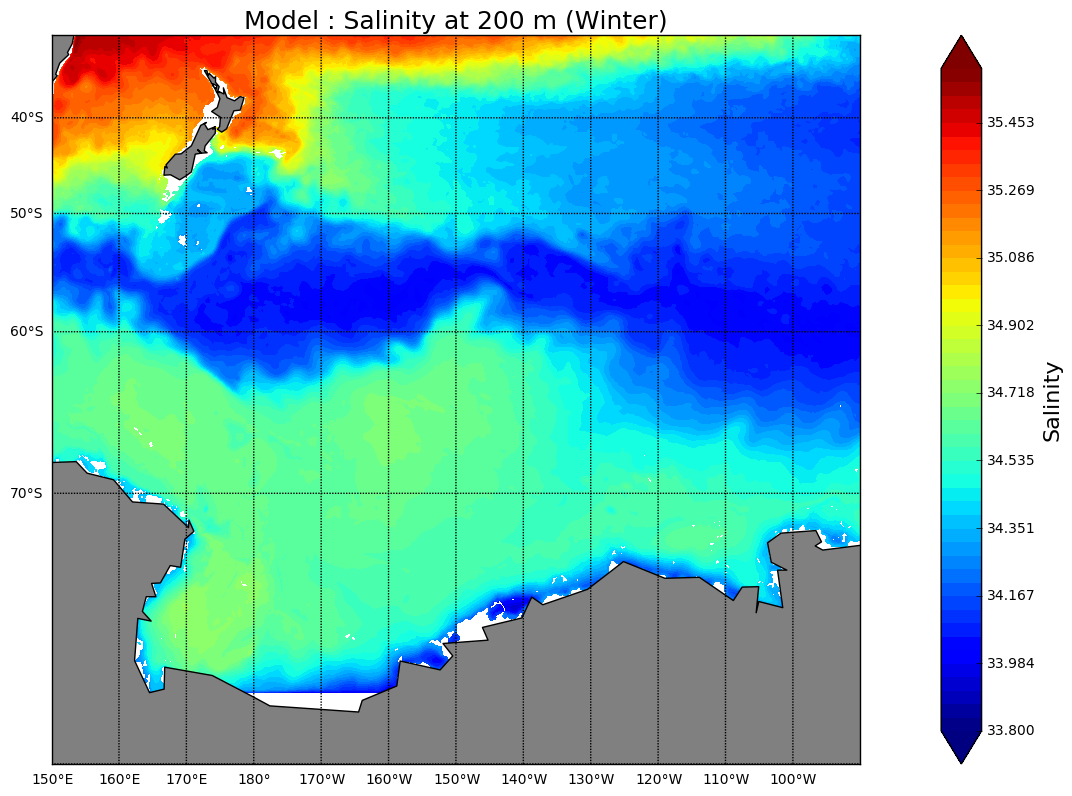

In [17]:
merc_map(np.linspace(32.1,35.5,50), Lon, Lat, mean_Salt_30_JJA, 'Model : Salinity at 30 m (Winter)', 'Salinity', plt.cm.jet, plot_path_jup, 'Summer_S_30_2_jup.png')
merc_map(np.linspace(33,35.5,50), Lon, Lat, mean_Salt_100_JJA, 'Model : Salinity at 100 m (Winter)', 'Salinity', plt.cm.jet, plot_path_jup, 'Summer_S_100_2_jup.png')
merc_map(np.linspace(33.8,35.6,50), Lon, Lat, mean_Salt_200_JJA, 'Model : Salinity at 200 m (Winter)', 'Salinity', plt.cm.jet, plot_path_jup, 'Summer_S_200_2_jup.png')